In [1]:
import numpy as np
import json

In [3]:
dataset = "pairflip"

In [4]:
path = "/home/xianglin/projects/DVI_data/noisy/{}/cifar10/embedding.npy".format(dataset)
embeddings = np.load(path)

path = "/home/xianglin/projects/DVI_data/noisy/{}/cifar10/clean_label.json".format(dataset)
with open(path, "r") as f:
    clean_label = json.load(f)
path = "/home/xianglin/projects/DVI_data/noisy/{}/cifar10/noisy_label.json".format(dataset)
with open(path, "r") as f:
    noisy_label = json.load(f)

clean_label = np.array(clean_label)
noisy_label = np.array(noisy_label)

In [5]:
embeddings = embeddings.reshape(50000,-1,2)

In [6]:
from noise_detector import NoiseTrajectoryDetector
ntd = NoiseTrajectoryDetector(embeddings, noisy_label)

In [11]:
cls_num=5
ntd.proj_cls(cls_num, period=66, repeat=2)
# ntd.proj_all(period=66) # 75

Suspect abnormal in embedding...
Calculating umap scores...
Calculating pca scores...
Finish calculating scores for class 5


In [12]:
for cls_num in range(10):
    print(cls_num, ntd.detect_noise_cls(cls_num))

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True


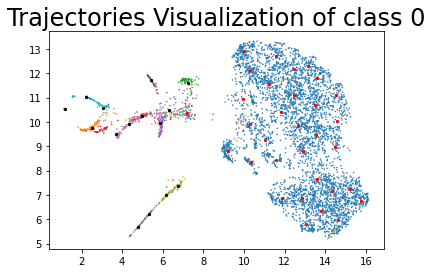

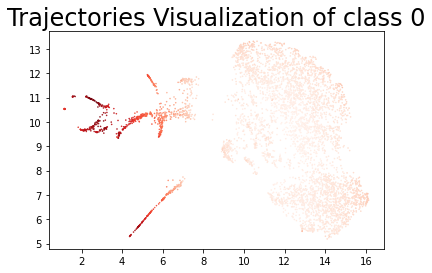

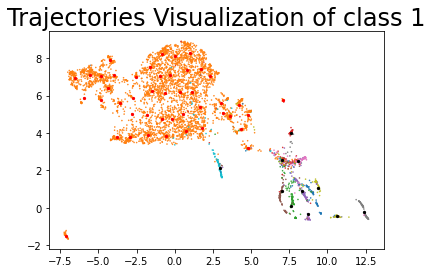

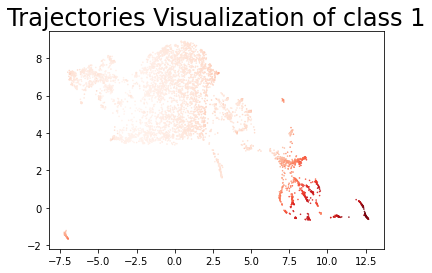

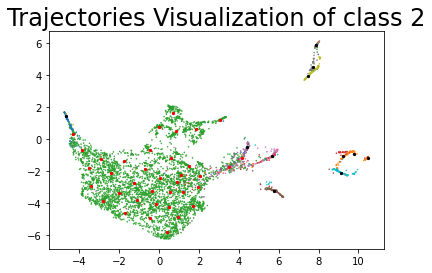

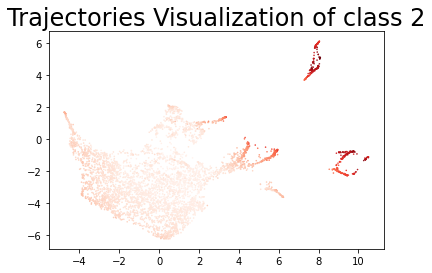

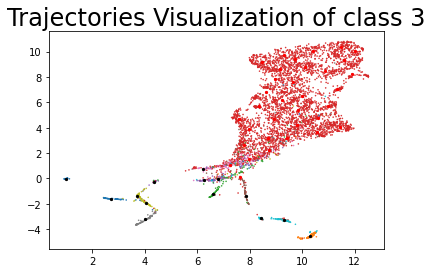

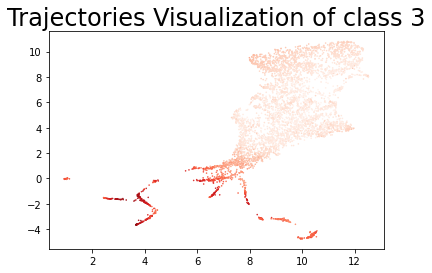

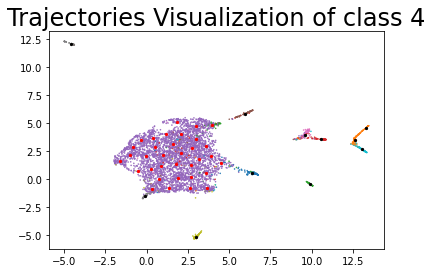

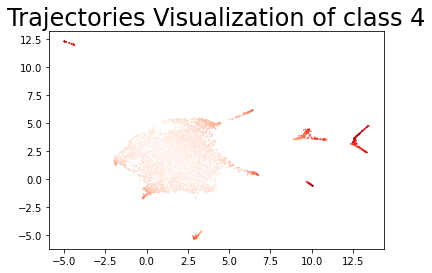

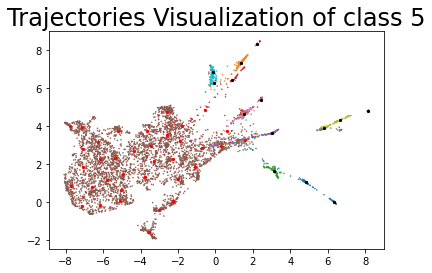

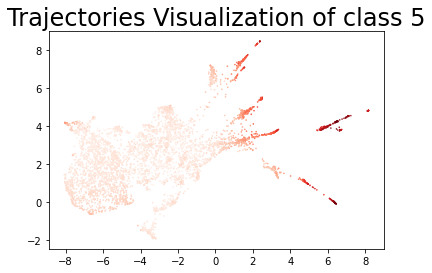

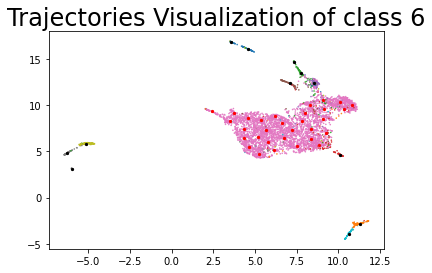

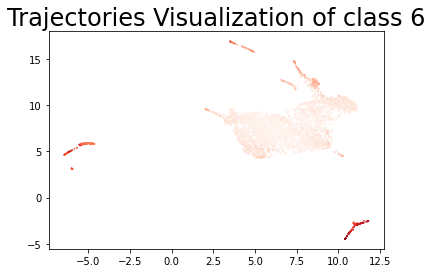

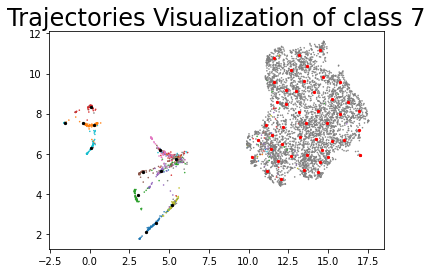

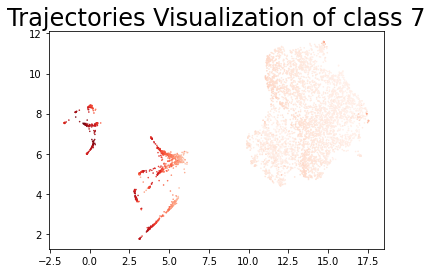

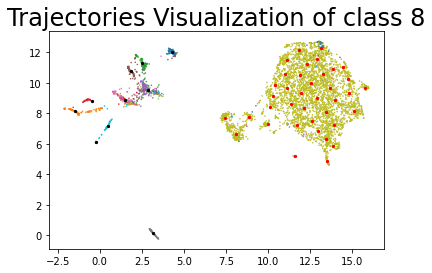

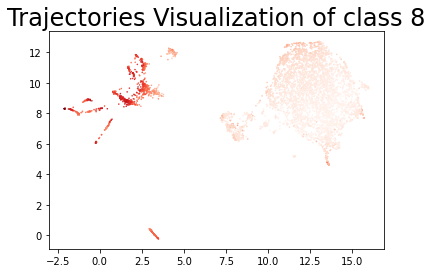

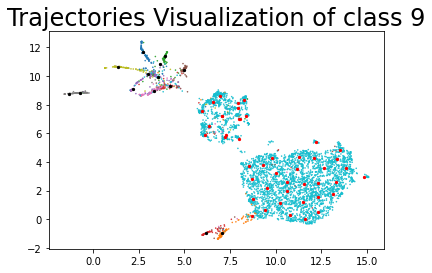

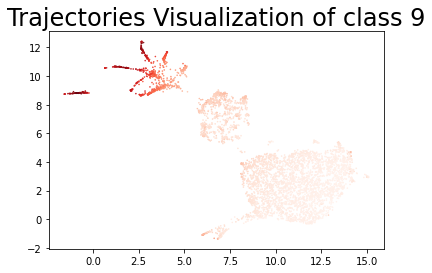

In [8]:
for num in range(10):
    ntd.show_ground_truth(num,clean_label[noisy_label==num])
    ntd.show_scores(num)

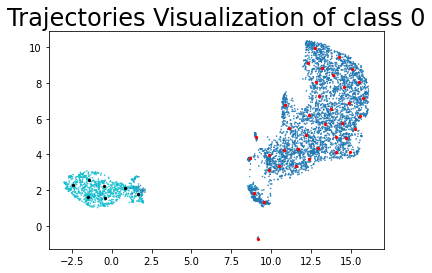

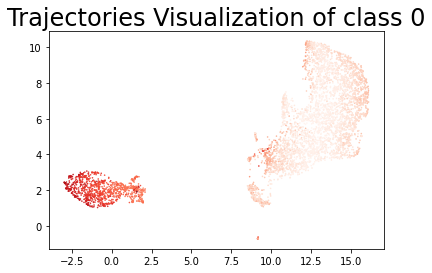

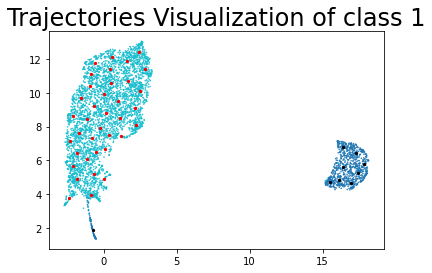

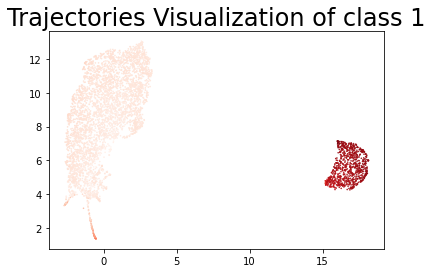

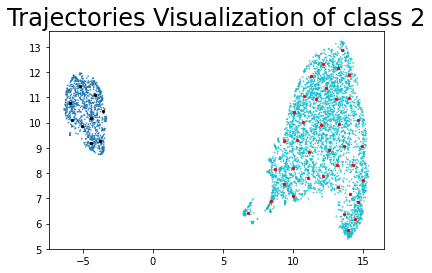

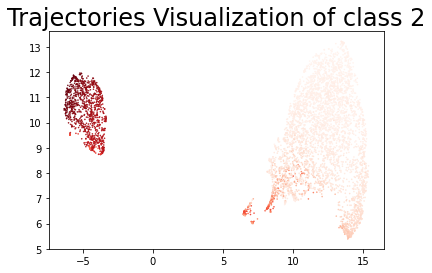

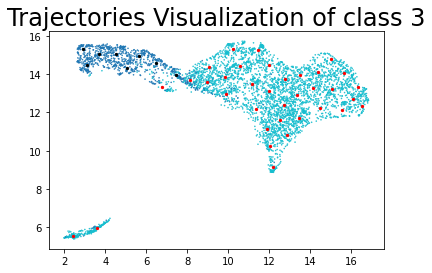

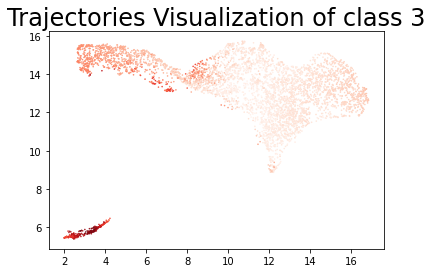

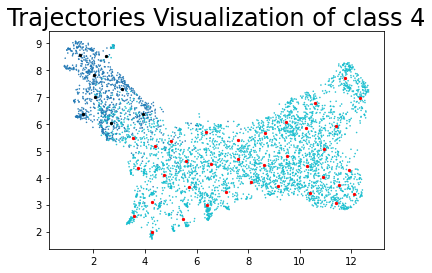

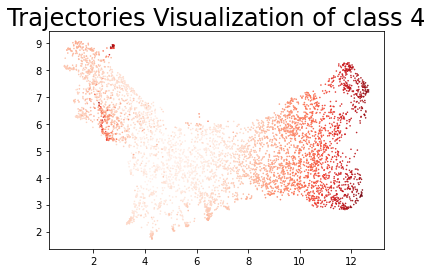

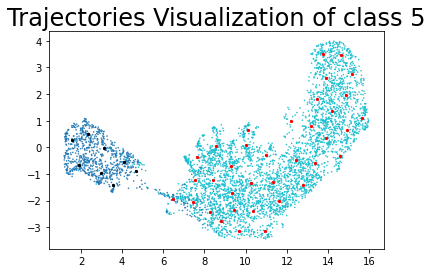

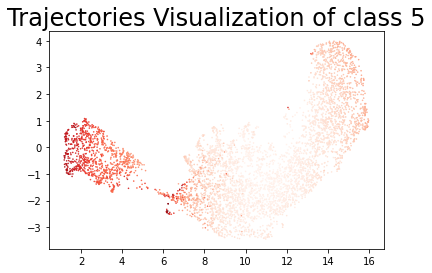

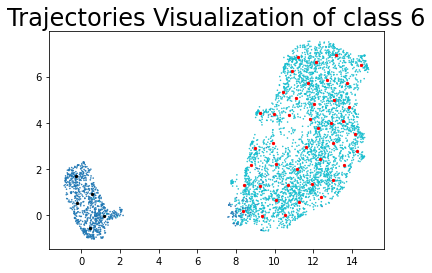

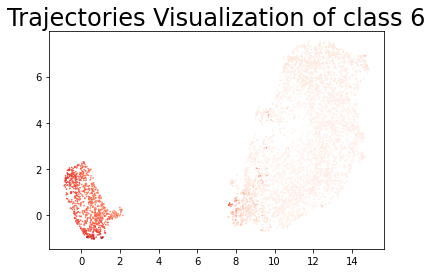

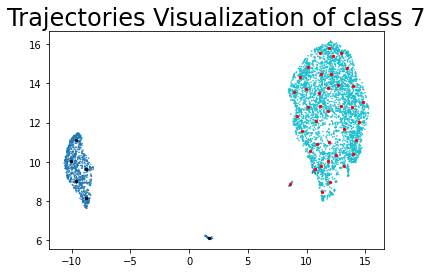

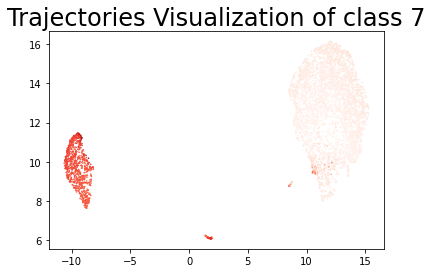

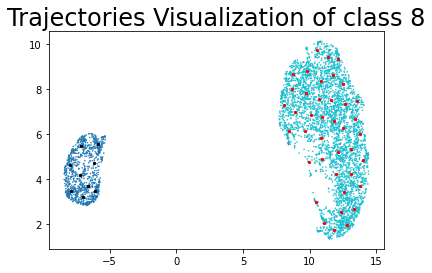

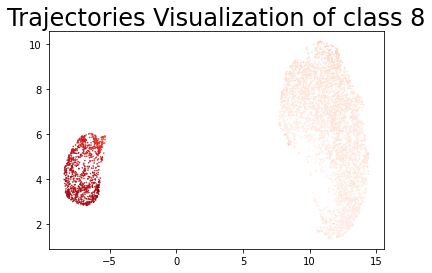

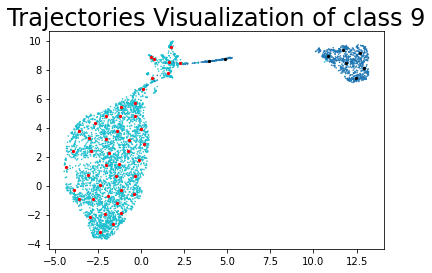

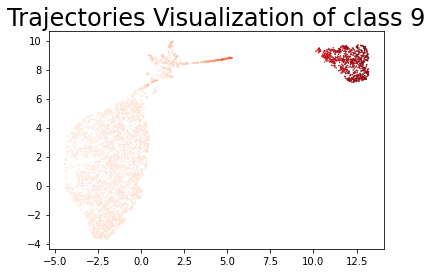

In [13]:
for num in range(10):
    ntd.show_ground_truth(num,clean_label[noisy_label==num])
    ntd.show_scores(num)

==================================0=========================================


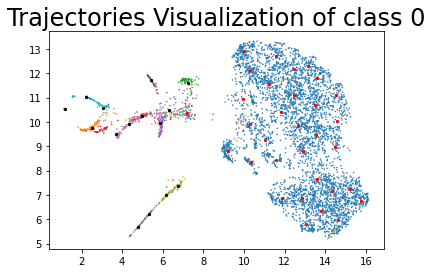

[1.0]	13 rounds find 13 (90%) noise samples
[1.0]	15 rounds find all 15 noise samples
==================================1=========================================


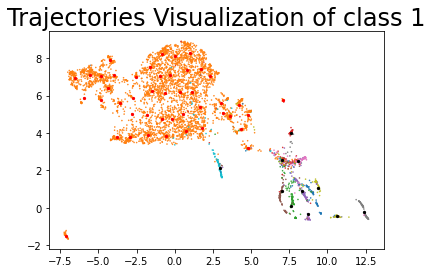

[0.75]	12 rounds find 9 (90%) noise samples
[0.4074074074074074]	27 rounds find all 11 noise samples
==================================2=========================================


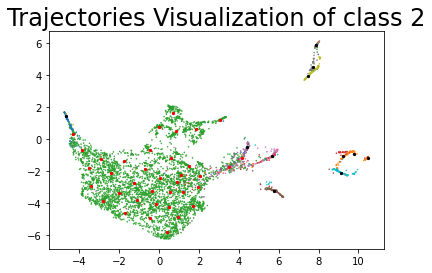

[1.0]	9 rounds find 9 (90%) noise samples
[0.9166666666666666]	12 rounds find all 11 noise samples
==================================3=========================================


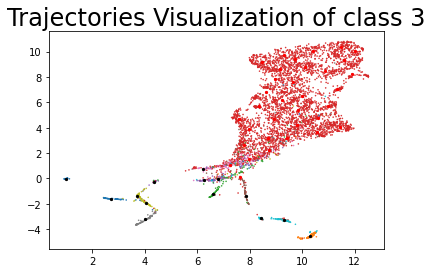

[0.9230769230769231]	13 rounds find 12 (90%) noise samples
[0.9333333333333333]	15 rounds find all 14 noise samples
==================================4=========================================


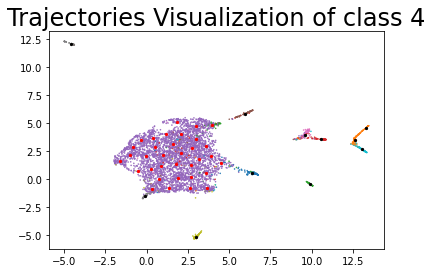

[1.0]	9 rounds find 9 (90%) noise samples
[1.0]	11 rounds find all 11 noise samples
==================================5=========================================


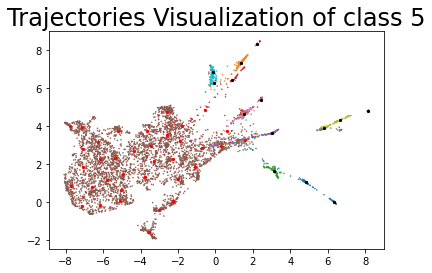

[1.0]	12 rounds find 12 (90%) noise samples
[0.7]	20 rounds find all 14 noise samples
==================================6=========================================


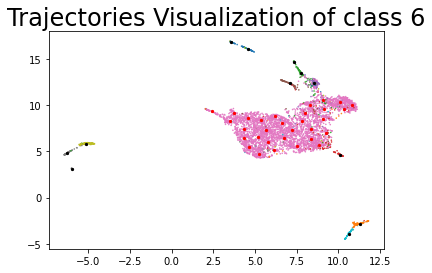

[1.0]	10 rounds find 10 (90%) noise samples
[0.9230769230769231]	13 rounds find all 12 noise samples
==================================7=========================================


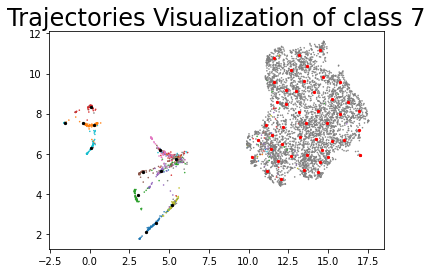

[1.0]	11 rounds find 11 (90%) noise samples
[1.0]	13 rounds find all 13 noise samples
==================================8=========================================


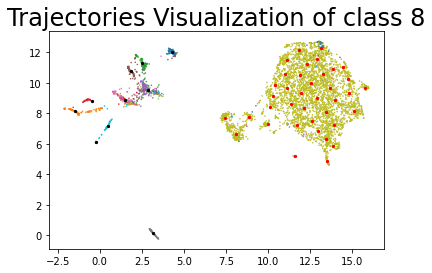

[1.0]	9 rounds find 9 (90%) noise samples
[1.0]	10 rounds find all 10 noise samples
==================================9=========================================


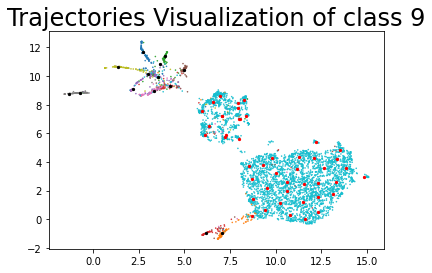

[0.5217391304347826]	23 rounds find 12 (90%) noise samples
[0.4827586206896552]	29 rounds find all 14 noise samples


In [9]:
from noise_detector import select_closest
import math

for num in range(10):
    print("=================================={}=========================================".format(num))
    clean_labels = clean_label[noisy_label==num]
    ntd.show_ground_truth(num,clean_labels)

    c = ntd.sub_centers[str(num)]
    embedding = ntd.trajectory_embedding[str(num)]
    centroids = embedding[c]

    # vote for labels and scores
    c_labels = select_closest(embedding, centroids)
    centroid_labels = np.zeros(len(centroids))
    for i in range(len(centroids)):
        centroid_labels[i] = np.bincount(clean_labels[c_labels==i]).argmax()

    gt = centroid_labels
    nt = np.sum(gt!=num)
    ct = len(c) - nt

    curr_nt = nt
    flag = math.floor(nt*0.9)
    target_flag = flag

    for t in range(len(c)):
        id, selected = ntd.suggest_abnormal(num)
        d = False
        if clean_label[noisy_label==num][id] != num:
            d = True
            flag=flag-1
            curr_nt=curr_nt-1
        ntd.update_belief(num, selected, d)
        # ntd.show_verified(num)
        if flag==0:
            print("[{}]\t{} rounds find {} (90%) noise samples".format(target_flag/(t+1), t+1, target_flag))
            flag=10000
        if curr_nt==0:
            print("[{}]\t{} rounds find all {} noise samples".format(nt/(t+1), t+1, len(c)-ct))
            break

==================================0=========================================


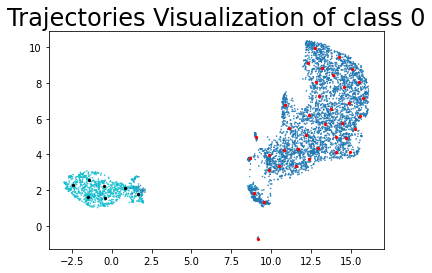

[1.0]	6 rounds find 6 (90%) noise samples
[1.0]	7 rounds find all 7 noise samples
==================================1=========================================


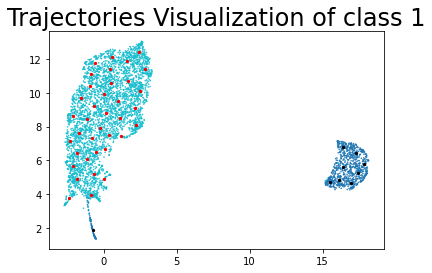

[1.0]	8 rounds find 8 (90%) noise samples
[1.0]	9 rounds find all 9 noise samples
==================================2=========================================


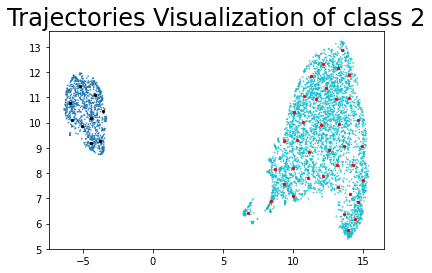

[1.0]	8 rounds find 8 (90%) noise samples
[1.0]	9 rounds find all 9 noise samples
==================================3=========================================


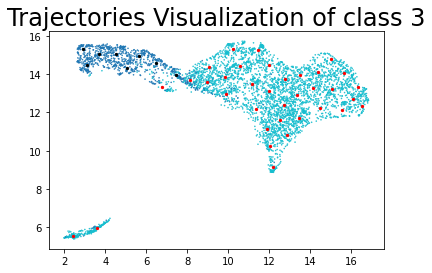

[0.875]	8 rounds find 7 (90%) noise samples
[0.34782608695652173]	23 rounds find all 8 noise samples
==================================4=========================================


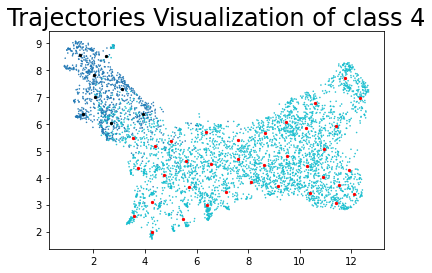

[0.30434782608695654]	23 rounds find 7 (90%) noise samples
[0.2962962962962963]	27 rounds find all 8 noise samples
==================================5=========================================


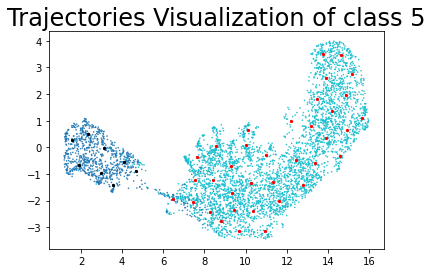

[1.0]	7 rounds find 7 (90%) noise samples
[1.0]	8 rounds find all 8 noise samples
==================================6=========================================


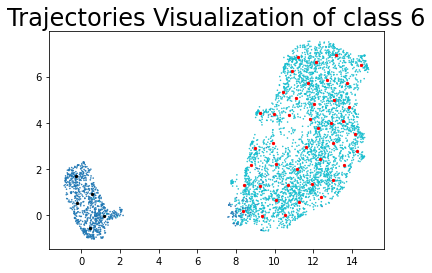

[1.0]	4 rounds find 4 (90%) noise samples
[0.35714285714285715]	14 rounds find all 5 noise samples
==================================7=========================================


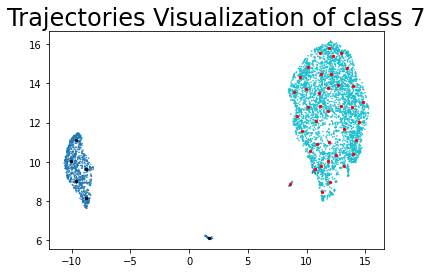

[1.0]	5 rounds find 5 (90%) noise samples
[1.0]	6 rounds find all 6 noise samples
==================================8=========================================


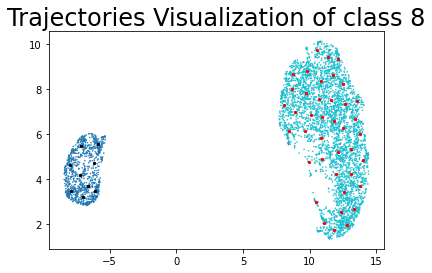

[1.0]	8 rounds find 8 (90%) noise samples
[1.0]	9 rounds find all 9 noise samples
==================================9=========================================


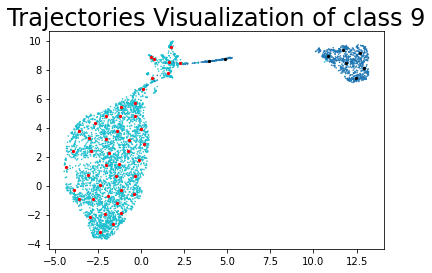

[1.0]	7 rounds find 7 (90%) noise samples
[1.0]	8 rounds find all 8 noise samples


In [14]:
from noise_detector import select_closest
import math

for num in range(10):
    print("=================================={}=========================================".format(num))
    clean_labels = clean_label[noisy_label==num]
    ntd.show_ground_truth(num,clean_labels)

    c = ntd.sub_centers[str(num)]
    embedding = ntd.trajectory_embedding[str(num)]
    centroids = embedding[c]

    # vote for labels and scores
    c_labels = select_closest(embedding, centroids)
    centroid_labels = np.zeros(len(centroids))
    for i in range(len(centroids)):
        centroid_labels[i] = np.bincount(clean_labels[c_labels==i]).argmax()

    gt = centroid_labels
    nt = np.sum(gt!=num)
    ct = len(c) - nt

    curr_nt = nt
    flag = math.floor(nt*0.9)
    target_flag = flag

    for t in range(len(c)):
        id, selected = ntd.suggest_abnormal(num)
        d = False
        if clean_label[noisy_label==num][id] != num:
            d = True
            flag=flag-1
            curr_nt=curr_nt-1
        ntd.update_belief(num, selected, d)
        # ntd.show_verified(num)
        if flag==0:
            print("[{}]\t{} rounds find {} (90%) noise samples".format(target_flag/(t+1), t+1, target_flag))
            flag=10000
        if curr_nt==0:
            print("[{}]\t{} rounds find all {} noise samples".format(nt/(t+1), t+1, len(c)-ct))
            break